#  Stock Market Data Processing and Analysis

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from csv file

df = pd.read_csv("../DATA/fusion_stock_data.csv")
df.head()

,Date,Company,Price,Volume
0,1 01 2022,Fusion Systems,66,15698
1,2 01 2022,Fusion Systems,53,42461
2,3 01 2022,Fusion Systems,92,26775
3,4 01 2022,Fusion Systems,55,27965
4,5 01 2022,Fusion Systems,56,44423


In [3]:
# Check dtype of dataset
df.dtypes

Date       object
Company    object
Price       int64
Volume      int64
dtype: object

In [4]:
# Details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     10 non-null     object
 1   Company  10 non-null     object
 2   Price    10 non-null     int64 
 3   Volume   10 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 452.0+ bytes


In [5]:
# Convert Date column to date-time dtype
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     10 non-null     datetime64[ns]
 1   Company  10 non-null     object        
 2   Price    10 non-null     int64         
 3   Volume   10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 452.0+ bytes


In [6]:
# Check missing values
df.isnull().sum()

Date       0
Company    0
Price      0
Volume     0
dtype: int64

In [7]:
# Set Date column as index
df.set_index('Date',inplace=True)
df.head()

,Company,Price,Volume
Date,,,
2022-01-01,Fusion Systems,66,15698
2022-02-01,Fusion Systems,53,42461
2022-03-01,Fusion Systems,92,26775
2022-04-01,Fusion Systems,55,27965
2022-05-01,Fusion Systems,56,44423


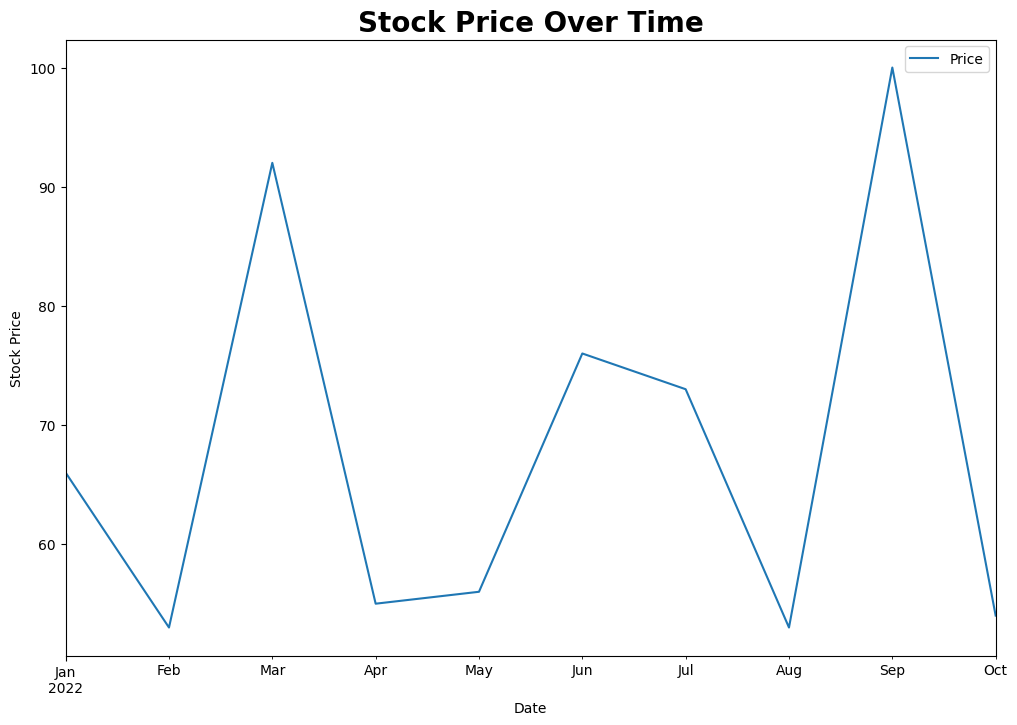

In [8]:
# Line plot of stock prices
fig,ax = plt.subplots(figsize=(12,8))
df.plot(
        y='Price',
        ax=ax) 
plt.title(label="Stock Price Over Time",
          fontdict={'fontsize':20,'fontweight':'bold'})
ax.set(xlabel="Date",ylabel="Stock Price")
plt.show()

In [9]:
# Volume of lowest Stock price
volume_lowest_price = df.loc[df['Price'].idxmin()]['Volume']
print(f"The volume on day with lowest price is {volume_lowest_price}")

The volume on day with lowest price is 42461


In [10]:
# Daily return of stock price
df['Return'] = df['Price'].pct_change()
df.head()

,Company,Price,Volume,Return
Date,,,,
2022-01-01,Fusion Systems,66,15698,NaN
2022-02-01,Fusion Systems,53,42461,-0.196970
2022-03-01,Fusion Systems,92,26775,0.735849
2022-04-01,Fusion Systems,55,27965,-0.402174
2022-05-01,Fusion Systems,56,44423,0.018182


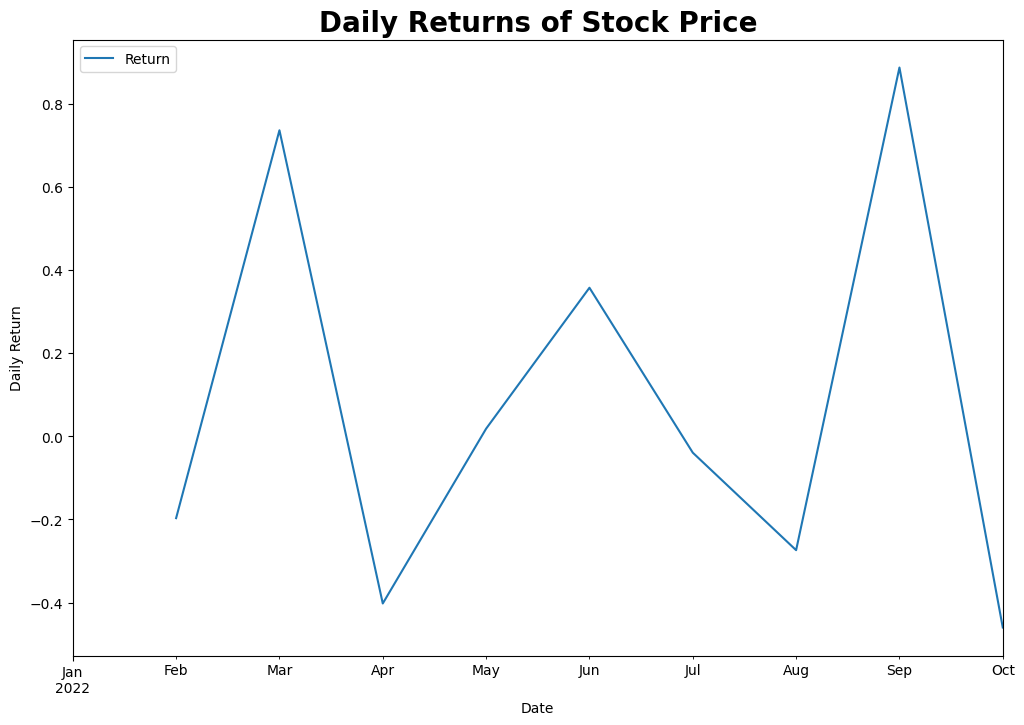

In [11]:
# Plot daily return
fig,ax = plt.subplots(figsize=(12,8))
df.plot(y='Return',ax=ax)
ax.set(xlabel='Date',ylabel='Daily Return')
plt.title(label="Daily Returns of Stock Price",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

In [12]:
# Maximum price of dataset
price_max = df.loc[:,'Price'].max()

# Subset of df of max price
price_max_df = df.loc[df['Price'] == price_max]

# Get date 
date_max_price = price_max_df.index[0]
date_max_price

Timestamp('2022-09-01 00:00:00')